# Data Science quick test regression 
The goal is to analyse and quick learn on this dataset 

In [38]:
# Bring all imports
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import numpy as np
np.random.seed(0)
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.model_selection import learning_curve

In [42]:
import os
path = os.path.join("/Users/hchaabane/Desktop/TP/live")
df = pd.read_excel(path  + '/input_excel.xlsx')

In [181]:
df.head()
df.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,U0001,PRD069042,F,0-17,10,A,2,0,3,3,3,8370
1,U0001,PRD248942,F,0-17,10,A,2,0,1,1,1,15200
2,U0001,PRD087842,F,0-17,10,A,2,0,12,12,12,1422
3,U0001,PRD085442,F,0-17,10,A,2,0,12,12,12,1057
4,U0002,PRD285442,M,55+,16,C,4+,0,8,8,8,7969


(537577, 12)

In [182]:
print("Number of rows ", df.shape[0])
print("Numbre of columns ", df.shape[1])
general_df = pd.concat([df.dtypes.to_frame(name="Column Type"), df.isnull().sum().to_frame(name="Nb of NULL")], axis=1)
general_df = general_df.reset_index().rename(columns={"index": 'Column Name'})
general_df["Most frequent values"] = general_df["Column Name"].apply(lambda col: df[col].value_counts().index.values[:10])
print("Here is a description of df\n")
general_df

Number of rows  537577
Numbre of columns  12
Here is a description of df



,Column Name,Column Type,Nb of NULL,Most frequent values
0,User_ID,object,0,"[U1680, U4277, U1941, U1181, U0889, U3618, U11..."
1,Product_ID,object,0,"[PRD265242, PRD110742, PRD025442, PRD112142, P..."
2,Gender,object,0,"[M, F]"
3,Age,object,0,"[26-35, 36-45, 18-25, 46-50, 51-55, 55+, 0-17]"
4,Occupation,int64,0,"[4, 0, 7, 1, 17, 20, 12, 14, 2, 16]"
5,City_Category,object,0,"[B, C, A]"
6,Stay_In_Current_City_Years,object,0,"[1, 2, 3, 4+, 0]"
7,Marital_Status,int64,0,"[0, 1]"
8,Product_Category_1,int64,0,"[5, 1, 8, 11, 2, 6, 3, 4, 16, 15]"
9,Product_Category_2,int64,0,"[5, 1, 8, 11, 2, 6, 3, 4, 16, 15]"


In [183]:
df["Product_Category_1"] = df["Product_Category_1"].fillna(0)
df["Product_Category_2"] = df["Product_Category_1"].fillna(0)
df["Product_Category_3"] = df["Product_Category_1"].fillna(0)

In [184]:
print("Number of rows ", df.shape[0])
print("Numbre of columns ", df.shape[1])
general_df = pd.concat([df.dtypes.to_frame(name="Column Type"), df.isnull().sum().to_frame(name="Nb of NULL")], axis=1)
general_df = general_df.reset_index().rename(columns={"index": 'Column Name'})
general_df["Most frequent values"] = general_df["Column Name"].apply(lambda col: df[col].value_counts().index.values[:10])
print("Here is a description of df\n")
general_df

Number of rows  537577
Numbre of columns  12
Here is a description of df



,Column Name,Column Type,Nb of NULL,Most frequent values
0,User_ID,object,0,"[U1680, U4277, U1941, U1181, U0889, U3618, U11..."
1,Product_ID,object,0,"[PRD265242, PRD110742, PRD025442, PRD112142, P..."
2,Gender,object,0,"[M, F]"
3,Age,object,0,"[26-35, 36-45, 18-25, 46-50, 51-55, 55+, 0-17]"
4,Occupation,int64,0,"[4, 0, 7, 1, 17, 20, 12, 14, 2, 16]"
5,City_Category,object,0,"[B, C, A]"
6,Stay_In_Current_City_Years,object,0,"[1, 2, 3, 4+, 0]"
7,Marital_Status,int64,0,"[0, 1]"
8,Product_Category_1,int64,0,"[5, 1, 8, 11, 2, 6, 3, 4, 16, 15]"
9,Product_Category_2,int64,0,"[5, 1, 8, 11, 2, 6, 3, 4, 16, 15]"


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,8.08271,0.408797,5.295546,5.295546,5.295546,9333.859853
std,6.52412,0.491612,3.750701,3.750701,3.750701,4981.022133
min,0.00000,0.000000,1.000000,1.000000,1.000000,185.000000
25%,2.00000,0.000000,1.000000,1.000000,1.000000,5866.000000
50%,7.00000,0.000000,5.000000,5.000000,5.000000,8062.000000
75%,14.00000,1.000000,8.000000,8.000000,8.000000,12073.000000
max,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


number of users 5891
number of products  3623
count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64


C:\Users\hchaabane\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


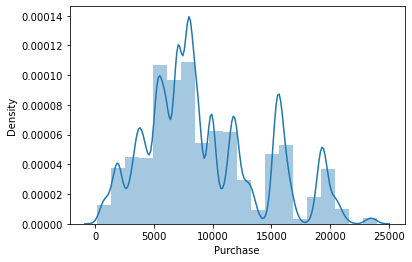

In [185]:
df.describe()
print("number of users", len(df.User_ID.unique()))
print("number of products ", len(df.Product_ID.unique()))
# decribe sales 
print(df.Purchase.describe())
#sales distribution 
sns.distplot(df.Purchase,bins=20)
plt.show()

In [186]:
df_per_user = df.groupby(["User_ID"])["Purchase"].sum()
df_per_user = df_per_user.reset_index()
print("Average spent per customer ", df_per_user.mean())


Average spent per customer  Purchase    851751.549482
dtype: float64


In [193]:
df_per_product = df.groupby(["Product_ID"])["Purchase"].sum()
df_per_product = df_per_product.reset_index()
df_per_product
print("\nAverage spent per product ", df_per_product["Purchase"].mean())
print("Here you can fin the best 10 products ")
df_per_product.sort_values(by= ["Purchase"], ascending=False).head(10)

,Product_ID,Purchase
0,PRD000142,12592163
1,PRD000242,3914901
2,PRD000342,1261383
3,PRD000442,441173
4,PRD000542,791219
...,...,...
3618,PRD99442,2813314
3619,PRD99642,83710
3620,PRD99742,967072
3621,PRD99842,721334



Average spent per product  1384948.4896494618
Here you can fin the best 10 products 


,Product_ID,Purchase
249,PRD025442,27532426
1014,PRD110742,26382569
2441,PRD255842,24652442
1743,PRD184942,24060871
581,PRD059442,23948299
1028,PRD112142,23882624
1016,PRD110942,23232538
2261,PRD237542,23096487
565,PRD057642,22493690
104,PRD010742,21865042


In [189]:
df_data = df.groupby(["User_ID"]).agg({"Product_ID" : "count" , "Product_Category_1" : "sum",  "Product_Category_2" : "sum",  "Product_Category_3" : "sum" , "Purchase" : "sum"})
df_data.rename({"Product_ID" : "Nb_of_purchased_products" ,
                    "Product_Category_1" : "QTY_pc1",
                   "Product_Category_2" : "QTY_pc2",
                   "Product_Category_3" : "QTY_pc3",
                   "Purchase" : "totalPurchase"}, axis= 1, inplace = True)
df_data = df_data.reset_index()
df_demographic_data = df[["User_ID", 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']].drop_duplicates()
df_data = pd.merge(df_data, df_demographic_data, how="inner" , on="User_ID")
df_data.head()

,User_ID,Nb_of_purchased_products,QTY_pc1,QTY_pc2,QTY_pc3,totalPurchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,U0001,34,193,193,193,333481,F,0-17,10,A,2,0
1,U0002,76,334,334,334,810353,M,55+,16,C,4+,0
2,U0003,29,93,93,93,341635,M,26-35,15,A,3,0
3,U0004,13,13,13,13,205987,M,46-50,7,B,2,1
4,U0005,106,659,659,659,821001,M,26-35,20,A,1,1


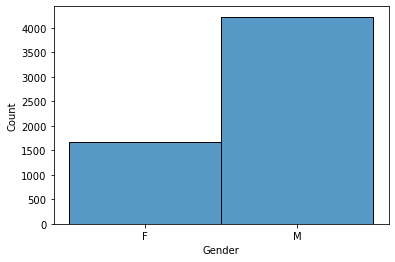

In [135]:
df_data.drop(["User_ID" , "Nb_of_purchased_products" , "QTY_pc1" , "QTY_pc2" , "QTY_pc3"], axis=1, inplace=True)


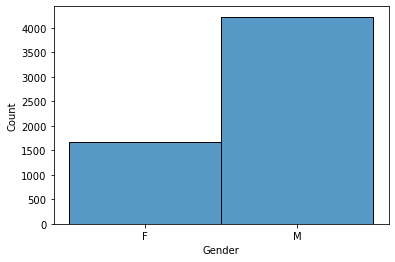

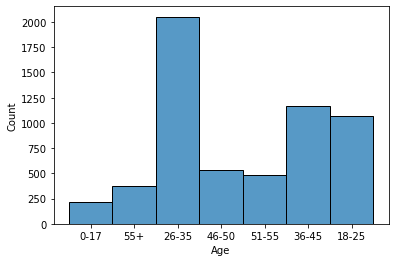

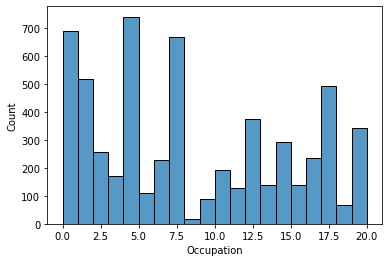

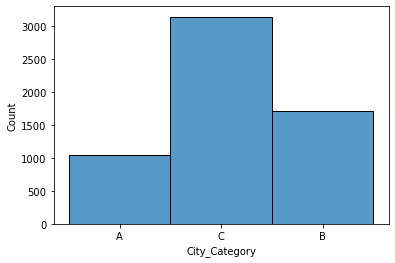

In [138]:
sns.histplot(data=df_data.Gender,bins=20)
plt.show()
sns.histplot(data=df_data.Age,bins=20)
plt.show()
sns.histplot(data=df_data.Occupation,bins=20)
plt.show()
sns.histplot(data=df_data.City_Category,bins=20)
plt.show()

In [131]:
from pandas.api.types import is_string_dtype
categorical_features = [col for col in df_data.columns if is_string_dtype(df_data[col])]
print(categorical_features)
df_data = pd.get_dummies(df_data, prefix=categorical_features)
df_data.head()

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


,totalPurchase,Occupation,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,333481,10,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,810353,16,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,341635,15,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,205987,7,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,821001,20,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


<Figure size 1080x576 with 0 Axes>

C:\Users\hchaabane\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hchaabane\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

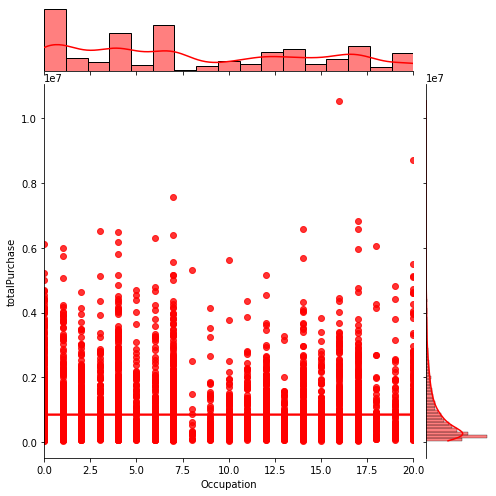

C:\Users\hchaabane\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hchaabane\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


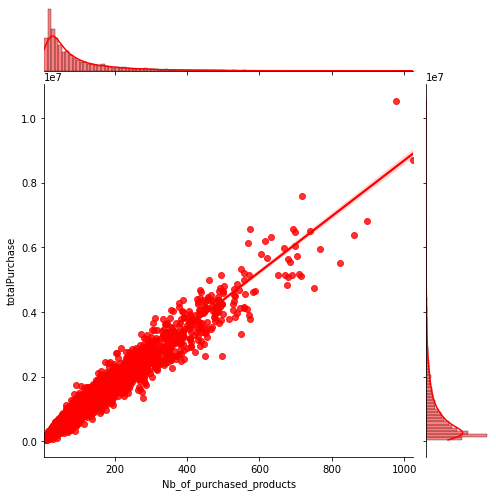

In [195]:
#see the general trend 
plt.figure(figsize=(15, 8))
features = ['Occupation', 'Nb_of_purchased_products']
# i: index
for i, col in enumerate(features):
    x = df_data[col]
    sns.jointplot(col, "totalPurchase", data=df_data, kind="reg",
            color="r", size=7)
    plt.show()

In [117]:
X = df_data.drop(["totalPurchase"], axis= 1)
y = df_data["totalPurchase"]

In [118]:
from sklearn.model_selection import train_test_split

#skrewed data, hence stratified split is better 
#let's conduct a stratified train test split. 10 % of data set is dedicated to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 42)
print ("Training set has {} samples ".format(X_train.shape[0]) ) 
print ("Testing set has {} samples ".format(X_test.shape[0]) ) 


Training set has 4123 samples 
Testing set has 1768 samples 


In [119]:
from sklearn.preprocessing import StandardScaler

# We fit the scaler to training data and then we transform training data and testing data with respect to the fitting. 
def scale(training,testing):
    scaler = StandardScaler()
    scaler.fit(training)
    X_train = pd.DataFrame(scaler.transform(training), columns=training.columns)
    X_test = pd.DataFrame(scaler.transform(testing),columns=testing.columns)
    return X_train,X_test

#scale training and testing data 
X_train, X_test = scale(X_train, X_test)

In [120]:
# define useful functions 
from time import time 

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100


from sklearn.metrics import make_scorer
score_metric = make_scorer(mean_absolute_percentage_error, greater_is_better=True)

def train_regressor(clf, X_train, y_train):
    #Fits a regressor to the training data.

    # Start the clock, train the regressor, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    print("Trained model in " + str(end - start) +  " seconds" )
    return end - start


def predict_target(clf, features, target):
    #Makes predictions using a fit regressor 

    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return mean_absolute_percentage_error(target, y_pred), end-start


def train_predict(clf, X_train, y_train, X_test, y_test):
    #Train and predict using a regressor based on F1 score

    # Indicate the regressor and the training set size
    print("")
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the regressor
    training_time = train_regressor(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    train_score, _  = predict_target(clf, X_train, y_train)
    test_score, test_prediction_time = predict_target(clf, X_test, y_test)
    
    print("Score for training set: {:.4f}.".format(train_score))
    print("Score for test set: {:.4f}.".format(test_score))
    return train_score, training_time, test_score, test_prediction_time
def Plot_learninCurve(Model,X,y):    

    # Ploting Learning Curve
    # Creating CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(Model,
                                               X, y, cv=10, scoring=score_metric, n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 50))

    # Creating means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Creating means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Drawing lines
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
    plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

    # Drawing bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='gray', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='gray', alpha=0.2)

    # Creating plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()

def display_feature_importance(clf_input, features):
    """
    If clf_input provides feature_importances feature then it returns feature importance list
    :param clf_input:
    :param features:
    :return:
    """
    try:
        # Display feature importance ranking
        feature_importance_table = pd.DataFrame(clf_input.feature_importances_,
                                                index=features,
                                                columns=['importance']).sort_values('importance', ascending=False)
        feature_importance_table["importance"] = feature_importance_table["importance"].apply(
            lambda x: str(round(x * 100, 4)) + " %")
        print(clf_input.__class__.__name__+ " feature importance Table")
        print(feature_importance_table)
    except Exception as e:
        pass

    try:
        feature_importance_table = pd.DataFrame(clf.coef_[0],
                                                    index=features,
                                                    columns=['importance']).sort_values('importance',
                                                                                        ascending=False)
        feature_importance_table["importance"] = feature_importance_table["importance"].apply(
            lambda x: round(x, 4))
        print(clf.__class__.__name__ + "feature importance Table")
        print(feature_importance_table)
    except Exception as e:
        print(e)
        return []

    return feature_importance_table.to_dict()["importance"]

def grid_search_model(X_train, Y_train, X_test, Y_test, model, parameters, cv):

    if len(parameters):
        gridSearcher = GridSearchCV(estimator=model, param_grid=parameters, cv=cv, verbose=1, n_jobs=-1,
                                    scoring=score_metric)
        gridSearcher.fit(X_train, Y_train)

        gridSearcher.cv_results_
        print("\nGridsearch for " + model.__class__.__name__ + " :")
        print("\t - Score used for gridSearch is" , gridSearcher.scorer_)
        print("\t - Best Score : ", round(gridSearcher.best_score_, 4))
        print("\t - Best parameters: ", gridSearcher.best_params_)

        best_estimator = gridSearcher.best_estimator_
    else:
        model.fit(X_train, Y_train)
        best_estimator = model

    print("\n" + best_estimator.__class__.__name__ + " has a training accuracy score of {:.4f}.".format(
        best_estimator.score(X_train, Y_train)))
    print(best_estimator.__class__.__name__ + " has a testing accuracy score of {:.4f}.".format(
        best_estimator.score(X_test, Y_test)))
    

    best_estimator_info = pd.DataFrame(
        {
            "Model": [best_estimator.__class__.__name__],
            "Training_score": round(best_estimator.score(X_train, Y_train), 4),
            "Testing_score": round(best_estimator.score(X_test, Y_test), 4)
        }
    )
    return best_estimator, best_estimator_info

In [194]:

clfs = [
    DummyRegressor(strategy = "median"),
             AdaBoostRegressor(random_state=42),
            LinearRegression(),
#              RandomForestRegressor(random_state=42),
#              MLPRegressor(random_state=42, max_iter=100000 ),
             GradientBoostingRegressor(random_state=42)
        ]


samples = np.array([ 0.1, 0.33, 0.55, 0.78, 1. ]) * len(X_train)
n_training_examples = samples.astype(int)
perf_data = []
for clf in clfs:
    print("\n{}: \n".format(clf.__class__.__name__))
    for n in n_training_examples:
        train_score, training_time, test_score, test_prediction_time = train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
        importances = display_feature_importance(clf, X_train.columns)

        perf_data.append(
                pd.DataFrame(
                    {
                        "Model_nb_training_examples": [clf.__class__.__name__ + "_" + str(n)],
                        "Training_score": train_score,
                        "Training_time" : training_time,
                        "Testing_score": test_score,
                        "Prediction_time" : test_prediction_time,
                        "Importances": str(importances),
                    }
                )
            )
pd.concat(perf_data).sort_values('Testing_score', ascending=True)\
            .reset_index(drop=True)


DummyRegressor: 


Training a DummyRegressor using a training set size of 412. . .
Trained model in 0.0019996166229248047 seconds
Made predictions in 0.0010 seconds.
Made predictions in 0.0010 seconds.
Score for training set: 109.4385.
Score for test set: 107.7869.
'DummyRegressor' object has no attribute 'coef_'

Training a DummyRegressor using a training set size of 1360. . .
Trained model in 0.0010023117065429688 seconds
Made predictions in 0.0000 seconds.
Made predictions in 0.0000 seconds.
Score for training set: 107.1981.
Score for test set: 107.0152.
'DummyRegressor' object has no attribute 'coef_'

Training a DummyRegressor using a training set size of 2267. . .
Trained model in 0.0010182857513427734 seconds
Made predictions in 0.0000 seconds.
Made predictions in 0.0000 seconds.
Score for training set: 102.7543.
Score for test set: 103.4189.
'DummyRegressor' object has no attribute 'coef_'

Training a DummyRegressor using a training set size of 3215. . .
Trained model in 0.000

Score for training set: 18.6297.
Score for test set: 19.6041.
LinearRegressionfeature importance Table
                                 importance
Nb_of_purchased_products       1.226692e+06
Age_46-50                      1.226692e+06
Stay_In_Current_City_Years_3   1.226692e+06
Stay_In_Current_City_Years_2   1.226692e+06
Stay_In_Current_City_Years_1   1.226692e+06
Stay_In_Current_City_Years_0   1.226692e+06
City_Category_C                1.226692e+06
City_Category_B                1.226692e+06
City_Category_A                1.226692e+06
Age_55+                        1.226692e+06
Age_51-55                      1.226692e+06
Age_36-45                      1.226692e+06
QTY_pc1                        1.226692e+06
Age_26-35                      1.226692e+06
Age_18-25                      1.226692e+06
Age_0-17                       1.226692e+06
Gender_M                       1.226692e+06
Gender_F                       1.226692e+06
Marital_Status                 1.226692e+06
Occupation       

Trained model in 0.7953805923461914 seconds
Made predictions in 0.0100 seconds.
Made predictions in 0.0140 seconds.
Score for training set: 13.9276.
Score for test set: 15.3597.
GradientBoostingRegressor feature importance Table
                              importance
Nb_of_purchased_products       97.6869 %
QTY_pc1                          0.785 %
QTY_pc3                         0.7307 %
QTY_pc2                         0.4399 %
Gender_M                        0.1298 %
Occupation                        0.06 %
Gender_F                        0.0456 %
Age_18-25                       0.0244 %
Age_46-50                       0.0193 %
Age_26-35                       0.0154 %
Stay_In_Current_City_Years_1    0.0132 %
Age_51-55                       0.0102 %
Marital_Status                  0.0083 %
Stay_In_Current_City_Years_2     0.008 %
Stay_In_Current_City_Years_4+    0.007 %
Age_0-17                        0.0042 %
Age_36-45                       0.0034 %
Stay_In_Current_City_Years_0    0

,Model_nb_training_examples,Training_score,Training_time,Testing_score,Prediction_time,Importances
0,GradientBoostingRegressor_4123,14.054162,1.195181,15.228970,0.015642,[]
1,GradientBoostingRegressor_3215,13.927630,0.795381,15.359740,0.013999,[]
2,GradientBoostingRegressor_2267,13.712297,0.532574,15.363139,0.000000,[]
3,GradientBoostingRegressor_1360,13.481284,0.311477,15.722340,0.000000,[]
4,GradientBoostingRegressor_412,12.147291,0.192677,16.175529,0.009005,[]
5,LinearRegression_3215,18.169239,0.008003,18.323328,0.005005,"{'Nb_of_purchased_products': 1234415.738, 'Age..."
6,LinearRegression_4123,18.365299,0.007007,18.399702,0.002000,"{'Nb_of_purchased_products': 1222278.1428, 'Ag..."
7,LinearRegression_2267,18.553729,0.007001,18.672014,0.003001,"{'Nb_of_purchased_products': 1212156.7831, 'Ag..."
8,LinearRegression_1360,18.629699,0.005000,19.604079,0.005003,"{'Nb_of_purchased_products': 1226691.8084, 'Ag..."
9,LinearRegression_412,21.412908,0.000000,20.958455,0.001996,"{'Nb_of_purchased_products': 1407601.3324, 'Ag..."


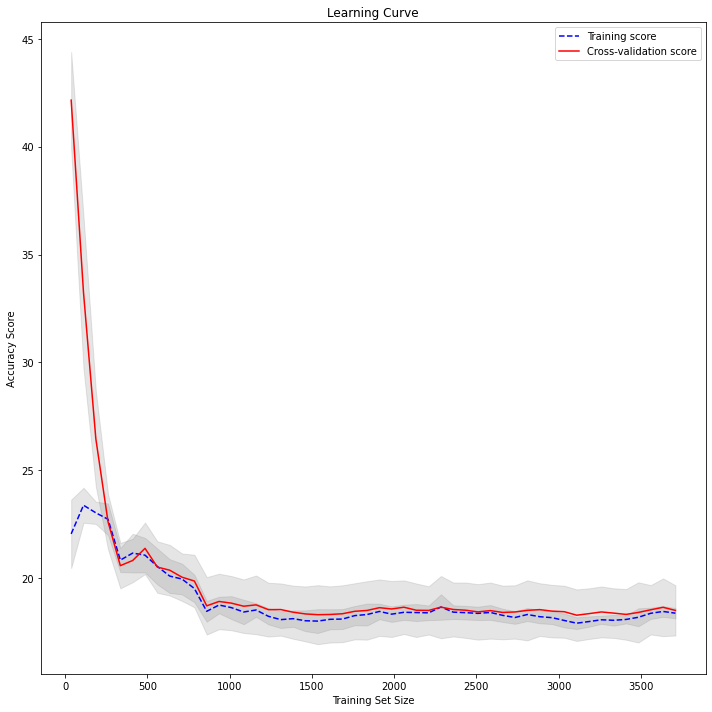

In [122]:
Plot_learninCurve( LinearRegression(),X_train,y_train)

In [125]:
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
parameters = dict()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
best_model, best_model_info = grid_search_model(X_train, y_train, X_test, y_test, LinearRegression(), parameters, cv)


Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished



Gridsearch for LinearRegression :
	 - Score used for gridSearch is make_scorer(mean_absolute_percentage_error)
	 - Best Score :  243.9291
	 - Best parameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}

LinearRegression has a training accuracy score of 0.1382.
LinearRegression has a testing accuracy score of 0.1642.
